# HW250422-Exercise_of_PANDAS.ipynb

## numpy: Exercise 2

Given a vector **x**, construct in Python the following matrix:

$$
V = 
\begin{bmatrix}
x_0^5 & x_0^4 & \cdots & x_0^1 & x_0^0 \\
x_1^5 & x_1^4 & \cdots & x_1^1 & x_1^0 \\
\vdots & \vdots & & \vdots & \vdots \\
x_5^5 & x_5^4 & \cdots & x_5^1 & x_5^0 \\
\end{bmatrix}
$$

Here, \( $ x_i $ \) are the components of the vector **x** (numbered from zero). Given a vector **y**, solve in Python the linear equation system `Va = y`. Let the components of **a** be denoted by \( $a_i$ \), \( i = 0, $\ldots$, 5 \). Write a function `poly`, which has **a** and **z** as input and computes the polynomial:

$$
p(z) = \sum_{i=0}^{5} a_{5-i} z^i
$$

Plot this polynomial and depict in the same plot the points $(x_i, y_i)$ as small stars. Try your code with the vectors:

$$
x = (0.0, 0.5, 1.0, 1.5, 2.0, 2.5) \\
y = (-2.0, 0.5, -2.0, 1.0, -0.5, 1.0)
$$


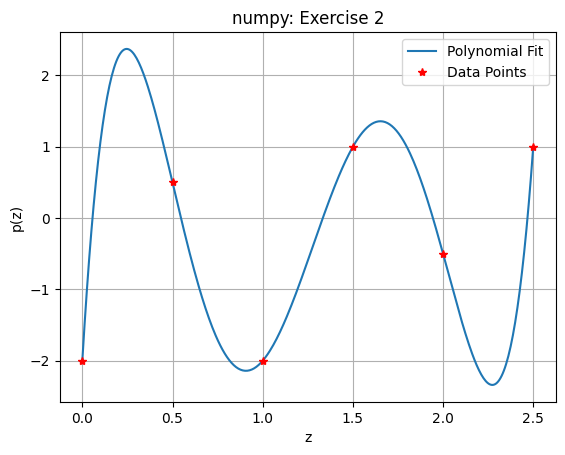

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# generate matrix V (Vandermonde matrix)
x = np.linspace(0, 2.5, 6)
y = np.array([-2.0, 0.5, -2.0, 1.0, -0.5, 1.0])

V = np.vander(x)

# get a
a = np.linalg.solve(V, y)

def poly(a, z):
    return sum(a[5-i] * z ** i for i in range(6))

z_vals = np.linspace(min(x), max(x), 400)
p_vals = [poly(a, z) for z in z_vals]

plt.plot(z_vals, p_vals, '', label = "Polynomial Fit")
plt.plot(x, y, 'r*', label = "Data Points")
plt.title("numpy: Exercise 2")
plt.xlabel("z")
plt.ylabel("p(z)")
plt.grid()
plt.legend()
plt.show()

## Exercise 1
* build a DataFrame object which contains at least
three countries records for America, Asia,
Europe, and Africa. Use multiple index for the
row, and the columns contain population and
area size (in $km^2$)
* select records of Asia, and Europe
* add a new column of GDP to the records

>List of Countries by Population, Area, GDP (PPP)
> | Continents | Countries      | Population  | Area      | GDP    |
> |:----------:|:--------------:|------------:|----------:|-------:|
> | Americas   | United States  | 341,963,408 | 9,833,517 | 24.977 |
> | Americas   | Canada         |  38,794,813 | 9,984,670 |  2.242 |
> | Americas   | Mexico         | 130,739,927 | 1,964,375 |  2.873 |
> | Asia       | Taiwan         |  23,595,274 |    35,980 |  1.143 |
> | Asia       | Japan          | 123,201,945 |   377,915 |  5.747 |
> | Asia       | Korea, South   |  52,081,799 |    99,720 |  2.615 |
> | Europe     | Germany        |  84,119,100 |   357,022 |  5.295 |
> | Europe     | United Kingdom |  68,459,055 |   243,610 |  3.728 |
> | Europe     | France         |  68,374,591 |   643,801 |  3.786 |
> | Africa     | South Africa   |  60,442,647 | 1,219,090 |  0.865 |
> | Africa     | Egypt          | 111,247,248 | 1,001,450 |  1.912 |
> | Africa     | Nigeria        | 236,747,130 |   923,768 |  1.275 |
> * From: The World Factbook, CIA (2025)
> * Area: square kilometers
> * GDP: purchasing power parity (PPP), trillions of USD

In [138]:
import pandas as pd

index = pd.MultiIndex.from_tuples([
    ("Americas", "United States"),
    ("Americas", "Canada"),
    ("Americas", "Mexico"),
    ("Asia",     "Taiwan"),
    ("Asia",     "Japan"),
    ("Asia",     "Korea, South"),
    ("Europe",   "Germany"),
    ("Europe",   "United Kingdom"),
    ("Europe",   "France"),
    ("Africa",   "South Africa"),
    ("Africa",   "Egypt"),
    ("Africa",   "Nigeria"),
], names = ["Continent", "Countries"])

data = pd.DataFrame([
    ["341,963,408",	"9,833,517"],
    ["38,794,813",	"9,984,670"],
    ["130,739,927",	"1,964,375"],
    
    ["23,595,274",	"35,980"],
    ["123,201,945",	"377,915"],
    ["52,081,799",	"99,720"],
    
    ["84,119,100",	"357,022"],
    ["68,459,055",	"243,610"],
    ["68,374,591",	"643,801"],
    
    ["60,442,647",	"1,219,090"],
    ["111,247,248",	"1,001,450"],
    ["236,747,130",	"923,768"]
], index = index, columns = ["Population", "Area"])

print("1. List of Countries by Population, Area, GDP (PPP)")
print(data, "\n")

print("2. List of Asia, Europe")
print(data.loc[["Asia", "Europe"], slice(None)], "\n")

data["GDP"] = [
    24.977, 2.242, 2.873,
    1.143, 5.747, 2.615,
    5.295, 3.728, 3.786,
    0.865, 1.912, 1.275
]
print("3. Add GDP")
print(data)

1. List of Countries by Population, Area, GDP (PPP)
                           Population       Area
Continent Countries                             
Americas  United States   341,963,408  9,833,517
          Canada           38,794,813  9,984,670
          Mexico          130,739,927  1,964,375
Asia      Taiwan           23,595,274     35,980
          Japan           123,201,945    377,915
          Korea, South     52,081,799     99,720
Europe    Germany          84,119,100    357,022
          United Kingdom   68,459,055    243,610
          France           68,374,591    643,801
Africa    South Africa     60,442,647  1,219,090
          Egypt           111,247,248  1,001,450
          Nigeria         236,747,130    923,768 

2. List of Asia, Europe
                           Population     Area
Continent Countries                           
Asia      Taiwan           23,595,274   35,980
          Japan           123,201,945  377,915
          Korea, South     52,081,799   99,720
E

## Exercise 2
* read in the IRIS file and group them into two
groups : training_data, and test_data
* use Boolean array to select data in each class
which distance to the class center is less than
1.5 sigma.
* plot selected data in red, and others in (blue,
green, orange for each class)

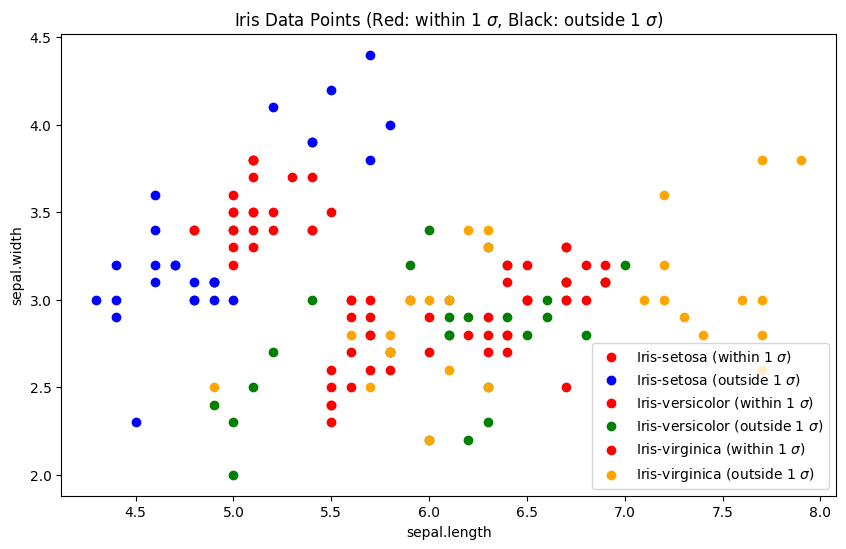

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

iris = pd.read_csv("~/iris.data")

grouped = iris.groupby('variety')

variety = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
color   = ["blue", "green", "orange"]

for i in range(3):
    group = grouped.get_group(variety[i])
    group_2d = group[["sepal.length", "sepal.width"]]
    train, test = train_test_split(group_2d, test_size=0.8, random_state=42)
    
    # Calculate sigma
    center = train.mean()
    distances = np.linalg.norm(train - center, axis=1)
    sigma = np.std(distances)
    
    # All Data
    distances_all = np.linalg.norm(group_2d - center, axis=1)
    selected = distances_all < (1.5 * sigma)
    
    # < 1.5 * sigma
    plt.scatter(group_2d.loc[selected,"sepal.length"], group_2d.loc[selected,"sepal.width"], 
                color = 'red', label = f'{variety[i]} (within 1 $\sigma$)')
    # >= 1.5 * sigma
    plt.scatter(group_2d.loc[~selected,"sepal.length"], group_2d.loc[~selected,"sepal.width"], 
                color = color[i], label = f'{variety[i]} (outside 1 $\sigma$)')

plt.title("Iris Data Points (Red: within 1 $\sigma$, Black: outside 1 $\sigma$)")
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.legend()
plt.show()

## References
* numpy.vander  
https://numpy.org/doc/stable/reference/generated/numpy.vander.html
* numpy.linalg.solve  
https://numpy.org/doc/2.2/reference/generated/numpy.linalg.solve.html
* train_test_split  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

* The World Factbook  
https://www.cia.gov/the-world-factbook/countries/united-states/